# Diagrama de barras

## 1. importar las librerías + csv con los datos de la encuesta. 

In [79]:
# importar librerias

import pandas as pd
import plotly.express as px  
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
import webbrowser
from threading import Timer
import us

#crear un dataframe con toda la informacion de la encuesta
df_csv = pd.read_csv ('survey_results_public.csv', index_col = [0]) # El indice sera la columna con el ID de la respuesta
df_csv #mostrar df ()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,2,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,4,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0


## 2. Preprocesar datos.

Tratar las columnas/conjunto de datos para comenzar a crear los gráficos. En este caso Age1stcode

In [80]:
df_csv['Age1stCode'].value_counts() 

11 - 17 years           44170
18 - 24 years           20065
5 - 10 years            11720
25 - 34 years            4199
35 - 44 years            1312
Younger than 5 years      905
45 - 54 years             544
55 - 64 years             245
Older than 64 years        83
Name: Age1stCode, dtype: int64

Para lidiar con rangos de edades, algunos de los cuales tienen texto, se va a calcular una nueva columna con la media de todos ellos. 


In [81]:
#se hace una copia del df.
df= df_csv.copy()

#normalizar todos los datos.

df = df[df['Age1stCode'].notna()] #eliminar los nulos


df.loc[df["Age1stCode"] == "Younger than 5 years", "Age1stCode"] = "04 - 04 years" #ya hay un 05 anyos en el df. 
df.loc[df["Age1stCode"] == "Older than 64 years", "Age1stCode"] = "65 - 65 years"
df.loc[df["Age1stCode"] == "5 - 10 years", "Age1stCode"] = "05 - 10 years"

#primero se seleccionan los digitos del string (la columna del df es string) y el resultado se convierte a entero
df['min'] = df.Age1stCode.astype(str).str[:2].astype(int) #la edad minima del rango es el primer numero
df['max'] = df.Age1stCode.astype(str).str[5:7].astype(int) # el maximo es el segundo numero

#una vez ya se tiene la edad minima y la maxima, se calcula la media de ambas columnas.
df['media'] = df[['min', 'max']].mean(axis=1)


## 3. Grafico. 

En este caso, un diagrama de barras.

In [82]:
app = Dash(__name__)
app.layout = html.Div([

    html.H1("Tipo de desarrollador", style={'text-align': 'center'}), #cabecero h1. Header
    
    #primera mini prueba con un menu desplegable.
    dcc.Dropdown(id="select_opt",  
                 options=[ #el usuario va a ver las label.
                     {"label": "#", "value": "numero"},
                     {"label": "%", "value": "porcentaje"}],
                 multi=False,
                 value="numero",
                 style={'width': "40%"}
                 ),

    dcc.Graph(id='my_survey', figure={}) # graph container

])

In [84]:
@app.callback(
    Output(component_id='my_survey', component_property='figure'),
    Input(component_id='select_opt', component_property='value'))
def update_graph(option_slctd):
    #filtered_df = df[df.year == selected_year]
    fig = px.histogram(df, x="media",
                      title='Histograma de edad',
                      labels={'media':'media', 'count':'total'}, # can specify one label per df column
                      opacity=0.8,
                      color_discrete_sequence=['indianred'] # color of histogram bars
                   )
        
    
    return fig

## 4. run server

In [ ]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [2]:
total = df_csv['MainBranch'].value_counts() 

In [7]:
df['MainBranch'].value_counts().plot(df['MainBranch'], kind='bar', xlabel='main branch', ylabel='frequency')

I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
Other                                                                              513
Name: MainBranch, dtype: int64

In [7]:
#px.bar(df, x="MainBranch", y="Counts")
df.groupby('<col_name>')['<col_name>'].count()
px.bar(df, x="<col_name>", y="counts", color="counts", title="----------")
df.groupby(['MainBranch']).count()#.plot(kind='bar')

,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
MainBranch,,,,,,,,,,,,,,,,,,,,,
I am a developer by profession,58110,58153,10874,3213,58031,58068,57865,57285,54346,55785,...,57573,57464,56401,51802,55569,54167,53737,57000,57131,42748
I am a student who is learning to code,12009,12029,1210,390,11959,11993,11954,11535,0,2332,...,11837,11824,11556,10143,11353,11148,10973,11784,11813,0
"I am not primarily a developer, but I write code sometimes as part of my work",6572,6578,1410,410,6564,6566,6539,6428,5623,5817,...,6495,6477,6328,5794,6253,6110,6068,6413,6440,4096
I code primarily as a hobby,4895,4929,1037,289,4846,4903,4895,4730,0,1344,...,4792,4814,4725,4109,4639,4564,4532,4827,4857,0
"I used to be a developer by profession, but no longer am",1235,1237,274,96,1233,1233,1233,1216,998,945,...,1223,1223,1200,1103,1192,1159,1157,1213,1224,0
Other,502,513,115,20,493,480,477,447,249,261,...,487,484,468,415,458,455,453,474,483,0


<AxesSubplot:xlabel='main branch', ylabel='frequency'>

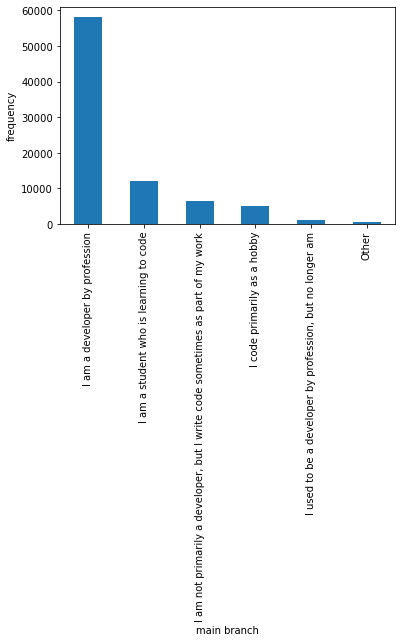

In [11]:
df['MainBranch'].value_counts().plot(kind='bar', xlabel='main branch', ylabel='frequency')

In [ ]:
dfg=df.groupby(MainBranch').count().reset_index()
dfg=dfg.rename(columns={"User": "Users"})

# plot structure
fig = px.bar(dfg,
             x='Date',
             y='Users',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

In [ ]:
counts = df.groupby(['day', 'MainBranch']).agg(len)